In [150]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm  
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [151]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics

In [85]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/bagusariyono/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [195]:
sms = pd.read_csv('/Users/bagusariyono/Downloads/UPDATED_NLP_COURSE/TextFiles/smsspamcollection.tsv', sep='\t')

In [39]:
pd.set_option('display.max_colwidth', None)

In [196]:
sms

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,2
...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",57,7
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,125,1


In [197]:
print(sms['message'][19:22])

19    England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/ú1.20 POBOXox36504W45WQ 16+
20                                                                                                                      Is that seriously how you spell his name?
21                                                                                                                I‘m going to try for 2 months ha ha only joking
Name: message, dtype: object


In [198]:
def Clean(Text):
    sms = re.sub('[^a-zA-Z]', ' ', Text)
    return sms

In [199]:
sms["numpunct"] = sms['message'].apply(Clean)

In [200]:
print(sms['numpunct'][19:22])

19    England v Macedonia   dont miss the goals team news  Txt ur national team to       eg ENGLAND to       Try WALES  SCOTLAND  txt       POBOXox     W  WQ    
20                                                                                                                      Is that seriously how you spell his name 
21                                                                                                                I m going to try for   months ha ha only joking
Name: numpunct, dtype: object


In [201]:
sms["token"]=sms.apply(lambda row: nltk.word_tokenize(row["numpunct"]), axis=1)

In [202]:
sms

,label,message,length,punct,numpunct,token
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,9,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,"[Go, until, jurong, point, crazy, Available, only, in, bugis, n, great, world, la, e, buffet, Cine, there, got, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,29,6,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,6,Free entry in a wkly comp to win FA Cup final tkts st May Text FA to to receive entry question std txt rate T C s apply over s,"[Free, entry, in, a, wkly, comp, to, win, FA, Cup, final, tkts, st, May, Text, FA, to, to, receive, entry, question, std, txt, rate, T, C, s, apply, over, s]"
3,ham,U dun say so early hor... U c already then say...,49,6,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,2,Nah I don t think he goes to usf he lives around here though,"[Nah, I, don, t, think, he, goes, to, usf, he, lives, around, here, though]"
...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",160,8,This is the nd time we have tried contact u U have won the Pound prize claim is easy call NOW Only p per minute BT national rate,"[This, is, the, nd, time, we, have, tried, contact, u, U, have, won, the, Pound, prize, claim, is, easy, call, NOW, Only, p, per, minute, BT, national, rate]"
5568,ham,Will ü b going to esplanade fr home?,36,1,Will b going to esplanade fr home,"[Will, b, going, to, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",57,7,Pity was in mood for that So any other suggestions,"[Pity, was, in, mood, for, that, So, any, other, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,125,1,The guy did some bitching but I acted like i d be interested in buying something else next week and he gave it to us for free,"[The, guy, did, some, bitching, but, I, acted, like, i, d, be, interested, in, buying, something, else, next, week, and, he, gave, it, to, us, for, free]"


In [203]:
print(sms['token'][19:22])

19    [England, v, Macedonia, dont, miss, the, goals, team, news, Txt, ur, national, team, to, eg, ENGLAND, to, Try, WALES, SCOTLAND, txt, POBOXox, W, WQ]
20                                                                                                       [Is, that, seriously, how, you, spell, his, name]
21                                                                                               [I, m, going, to, try, for, months, ha, ha, only, joking]
Name: token, dtype: object


In [204]:
lemma = WordNetLemmatizer()
def lemmatize(text):
    lemmas = [lemma.lemmatize(word, pos ='v') for word in text]
    return lemmas

In [205]:
sms["lemma"] = sms["token"].apply(lemmatize)
sms

,label,message,length,punct,numpunct,token,lemma
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",111,9,Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat,"[Go, until, jurong, point, crazy, Available, only, in, bugis, n, great, world, la, e, buffet, Cine, there, got, amore, wat]","[Go, until, jurong, point, crazy, Available, only, in, bugis, n, great, world, la, e, buffet, Cine, there, get, amore, wat]"
1,ham,Ok lar... Joking wif u oni...,29,6,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,155,6,Free entry in a wkly comp to win FA Cup final tkts st May Text FA to to receive entry question std txt rate T C s apply over s,"[Free, entry, in, a, wkly, comp, to, win, FA, Cup, final, tkts, st, May, Text, FA, to, to, receive, entry, question, std, txt, rate, T, C, s, apply, over, s]","[Free, entry, in, a, wkly, comp, to, win, FA, Cup, final, tkts, st, May, Text, FA, to, to, receive, entry, question, std, txt, rate, T, C, s, apply, over, s]"
3,ham,U dun say so early hor... U c already then say...,49,6,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, then, say]","[U, dun, say, so, early, hor, U, c, already, then, say]"
4,ham,"Nah I don't think he goes to usf, he lives around here though",61,2,Nah I don t think he goes to usf he lives around here though,"[Nah, I, don, t, think, he, goes, to, usf, he, lives, around, here, though]","[Nah, I, don, t, think, he, go, to, usf, he, live, around, here, though]"
...,...,...,...,...,...,...,...
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",160,8,This is the nd time we have tried contact u U have won the Pound prize claim is easy call NOW Only p per minute BT national rate,"[This, is, the, nd, time, we, have, tried, contact, u, U, have, won, the, Pound, prize, claim, is, easy, call, NOW, Only, p, per, minute, BT, national, rate]","[This, be, the, nd, time, we, have, try, contact, u, U, have, win, the, Pound, prize, claim, be, easy, call, NOW, Only, p, per, minute, BT, national, rate]"
5568,ham,Will ü b going to esplanade fr home?,36,1,Will b going to esplanade fr home,"[Will, b, going, to, esplanade, fr, home]","[Will, b, go, to, esplanade, fr, home]"
5569,ham,"Pity, * was in mood for that. So...any other suggestions?",57,7,Pity was in mood for that So any other suggestions,"[Pity, was, in, mood, for, that, So, any, other, suggestions]","[Pity, be, in, mood, for, that, So, any, other, suggestions]"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,125,1,The guy did some bitching but I acted like i d be interested in buying something else next week and he gave it to us for free,"[The, guy, did, some, bitching, but, I, acted, like, i, d, be, interested, in, buying, something, else, next, week, and, he, gave, it, to, us, for, free]","[The, guy, do, some, bitch, but, I, act, like, i, d, be, interest, in, buy, something, else, next, week, and, he, give, it, to, us, for, free]"


In [223]:
print(sms['lemma'][19:22])

19    [England, v, Macedonia, dont, miss, the, goals, team, news, Txt, ur, national, team, to, eg, ENGLAND, to, Try, WALES, SCOTLAND, txt, POBOXox, W, WQ]
20                                                                                                       [Is, that, seriously, how, you, spell, his, name]
21                                                                                                    [I, m, go, to, try, for, months, ha, ha, only, joke]
Name: lemma, dtype: object


In [224]:
wordlist= []
for i in sms["lemma"]:
    message = ' '.join([row for row in i])
    wordlist.append(message)

In [225]:
wordlist[19:22]

['England v Macedonia dont miss the goals team news Txt ur national team to eg ENGLAND to Try WALES SCOTLAND txt POBOXox W WQ',
 'Is that seriously how you spell his name',
 'I m go to try for months ha ha only joke']

In [181]:
#sms['lemma'] = LabelEncoder().fit_transform(sms['label'])

In [227]:
X=wordlist
y=sms['label']

In [308]:
from sklearn.preprocessing import LabelEncoder

In [309]:
# labelencoder = LabelEncoder()

In [280]:
#Remove puctuation

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [192]:
# countvec = CountVectorizer()
# X_count = countvec.fit_transform(wordlist).toarray()

In [217]:
# X_count.shape

In [230]:
tfidf = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf.fit_transform(X_train).toarray()
X_tfidf.shape

(3900, 5627)

In [176]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [259]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')

X_train_counts = count_vect.fit_transform(X_train)
X_train_counts.shape

(3900, 5627)

In [233]:
countvect = CountVectorizer(stop_words='english')

X_train_countvect = countvect.fit_transform(X_train)
X_train_countvect.shape

(3900, 5627)

In [288]:
# from textblob import TextBlob

In [297]:
# #lemmatization
# def lemma(text):
#     text = unicode(message, 'utf8').lower()
#     return[word.lemma for word in TextBlob(message).words]

In [282]:
#countvectorizer

In [143]:
X_train.shape

(3900, 6750)

In [144]:
len(countvect.get_feature_names())

6750

In [128]:
countvect.get_feature_names()

['aa',
 'aah',
 'aaniye',
 'aaooooright',
 'aathi',
 'ab',
 'abbey',
 'abdomen',
 'abeg',
 'abel',
 'aberdeen',
 'abi',
 'ability',
 'abiola',
 'abj',
 'able',
 'abnormally',
 'aboutas',
 'abroad',
 'absence',
 'absolutely',
 'absolutly',
 'abstract',
 'abt',
 'abta',
 'aburo',
 'abuse',
 'abusers',
 'ac',
 'academic',
 'acc',
 'accent',
 'accenture',
 'accept',
 'access',
 'accessible',
 'accidant',
 'accident',
 'accidentally',
 'accommodation',
 'accommodationvouchers',
 'accomodate',
 'accomodations',
 'accordin',
 'accordingly',
 'account',
 'accounts',
 'accumulation',
 'achan',
 'ache',
 'achieve',
 'acid',
 'acknowledgement',
 'acl',
 'acnt',
 'aco',
 'act',
 'actin',
 'action',
 'activ',
 'activate',
 'active',
 'activities',
 'actor',
 'actual',
 'actually',
 'ad',
 'adam',
 'add',
 'addamsfa',
 'addict',
 'addie',
 'address',
 'adewale',
 'adi',
 'adjustable',
 'admin',
 'administrator',
 'admirer',
 'admission',
 'admit',
 'adore',
 'adp',
 'adress',
 'adrian',
 'adrink',
 

In [225]:
#TFIDF

In [145]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_train_tfidf.shape

(3900, 6750)

In [ ]:
#Tfid Vectorizer

In [237]:
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train) # remember to use the original X_train set
X_train_tfidf.shape

(3900, 5627)

In [ ]:
#train classifier

In [252]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_tfidf,y_train)

LinearSVC()

In [ ]:
#pipeline

In [247]:
from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', LinearSVC())])

In [268]:
cv_score = cross_val_score(clf, X_train_tfidf,y_train,scoring="accuracy", cv=10)
scores= cv_score.mean()
scores

0.9794871794871796

In [267]:
cv_score = cross_val_score(clf, X_train_counts,y_train,scoring="accuracy", cv=10)
scores= cv_score.mean()
scores

0.9812820512820514

In [248]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [249]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.986244019138756


In [241]:
#CountVec
text_clf = Pipeline([('countvect', CountVectorizer()),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('countvect', CountVectorizer()), ('clf', LinearSVC())])

In [242]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [243]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9892344497607656


In [244]:
#CountVec with stop word ()
text_clf = Pipeline([('tfidf', CountVectorizer(stop_words='english')),
                     ('clf', LinearSVC()),
])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(steps=[('tfidf', CountVectorizer(stop_words='english')),
                ('clf', LinearSVC())])

In [245]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [246]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.9838516746411483


In [339]:
scores = cross_val_score(Pipeline, X_train, y_train,cv=5,scoring='accuracy')

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

In [194]:
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(sms['message']) # remember to use the original X_train set
X_train_tfidf.shape

(5572, 8713)

In [232]:
len(vectorizer.get_feature_names())

7004

In [200]:
X_train_tfidf

<3900x7263 sparse matrix of type '<class 'numpy.float64'>'
	with 52150 stored elements in Compressed Sparse Row format>

In [185]:
data =sms['message']

In [186]:
def tdm(data):
    vec = CountVectorizer()
    X = vec.fit_transform(data)
    df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
    return df

def find_principal_components(n, data):
    pca = PCA(n_components = n)
    principalComponents = pca.fit_transform(data)
    return pd.DataFrame(pca.components_, columns=data.columns)

In [187]:
df

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [183]:
df = tdm(X)
df

,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5568,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5569,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5570,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [188]:
df = tdm(X)
principalDF = find_principal_components(6, df)

In [189]:
print(principalDF) 

         00       000    000pes  008704050406      0089      0121  \
0 -0.000069  0.001778 -0.000101      0.000131  0.000134 -0.000070   
1  0.002696  0.002610  0.000015      0.000821  0.000400  0.000098   
2 -0.002762 -0.008034  0.000145      0.000221 -0.000552  0.000142   
3  0.000119  0.004610 -0.000089      0.000035 -0.000212  0.000154   
4 -0.001493 -0.010098  0.000172     -0.000734  0.000090 -0.000548   
5 -0.000318 -0.001307  0.000441      0.000063 -0.000386 -0.000175   

   01223585236  01223585334  0125698789        02  ...     zhong    zindgi  \
0     0.000019     0.000176   -0.000090  0.000902  ...  0.000072 -0.000307   
1     0.000092     0.000986    0.000017  0.000345  ... -0.000258 -0.000102   
2     0.000334    -0.001017    0.000168 -0.001225  ...  0.000101 -0.000086   
3    -0.000646    -0.000426   -0.000482  0.002014  ... -0.000431  0.000027   
4     0.000592     0.000190    0.000452 -0.003825  ...  0.000596 -0.000072   
5    -0.000196    -0.000150   -0.000286 -0.00062

NotFittedError: Vocabulary not fitted or provided

In [64]:
sms['label'] = LabelEncoder().fit_transform(sms['label'])

In [133]:
sms['text'] = sms.text.apply(str)

In [66]:
sms.dtypes

label     int64
text     object
dtype: object

In [176]:
#List of all SMS texts
documentList = df['text']
vect = CountVectorizer()
# #Frequency count matrix of all words in SMS texts
countMatrix = vect.fit_transform(sms['text'])
tokenizedDf = pd.DataFrame(countMatrix.toarray(), columns=vect.get_feature_names())

# #Encoding SMS texts for ML algorithms
resultEncodingDict = {'ham': 1, 'spam': 0}
resultList = df['label']
resultList.replace(sms['label'], inplace=True)
xTrain, xTest, yTrain, yTest = train_test_split(tokenizedDf, resultList, test_size=.3, random_state=123)

KeyError: 'text'

In [76]:
#Numpy array of frequency counts on tokenized SMS texts
frequencyCounts = tokenizedDf.values
#Encoded 'spam'/'ham' Series
encodedClassication = resultList.values

In [120]:
#Standardizing frequency count matrix
standardizedFreqCounts = StandardScaler().fit_transform(frequencyCounts)

In [121]:
pca = PCA(n_components=2000)
princComp = pca.fit_transform(standardizedFreqCounts)

In [110]:
#Concatinating pc1, pc2, and encoded classification array
#princDf = pd.DataFrame(princComp, columns=['pc1', 'pc2','pc3','pc4','pc5', 'pc6','pc7','pc8','pc9', 'pc10'])
princDf = pd.DataFrame(princComp)
mergedPrincDf = pd.concat([princDf, pd.Series(encodedClassication, name='classification')], axis=1)
mergedPrincDf.head()

,0,1,2,3,4,5,6,7,8,9,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,classification
0,-0.063700,-0.151997,-0.428451,-0.037529,-0.087692,0.062612,-1.418072,1.232113,-0.395863,-0.687086,...,-0.634363,0.648301,-0.080094,0.132614,0.158259,-0.249270,0.399498,-0.243263,-0.286212,ham
1,-0.002856,-0.104463,-0.772006,0.001415,-0.016176,0.095139,-0.963170,0.896465,-0.519916,-0.423579,...,0.276518,-0.829071,-0.386821,0.692552,0.317460,0.751970,-0.033644,-0.478489,1.394037,ham
2,-0.193925,-0.327665,-2.965923,-1.002291,-0.526362,-1.369539,5.621494,-11.278865,4.266407,2.066188,...,-0.145334,-0.087124,0.002723,-0.233177,-0.304071,-0.191022,-0.207484,0.087511,0.140312,spam
3,-0.018175,-0.103427,0.122268,0.096362,-0.074618,0.145494,-0.999944,1.115756,-0.712510,0.292906,...,0.244631,-1.082838,-0.709429,0.499596,-1.979566,0.924328,-1.126544,-2.411456,-1.626524,ham
4,0.062648,-0.128259,0.552869,0.044315,0.077306,0.089443,-0.930814,0.934571,-0.651575,-0.555858,...,-0.107261,2.047341,0.399520,-0.152317,1.050076,-0.573644,0.419450,2.750305,-1.632001,ham


In [97]:
#Looking at varience each explained by PC1 and PC2
pc1Var, pc2Var,pc3Var,pc4Var,pc5Var, pc6Var,pc7Var,pc8Var,pc9Var, pc10Var,pc11Var, pc12Var,pc13Var,pc14Var,pc15Var, pc16Var,pc17Var,pc18Var,pc19Var, pc20Var  = pca.explained_variance_ratio_
print(f'Varience explained by pc1 is: {pc1Var*100:.3f}%')
print(f'Varience explained by pc2 is: {pc2Var*100:.3f}%')
print(f'Varience explained by pc3 is: {pc3Var*100:.3f}%')
print(f'Varience explained by pc4 is: {pc4Var*100:.3f}%')
print(f'Varience explained by pc5 is: {pc5Var*100:.3f}%')
print(f'Varience explained by pc6 is: {pc6Var*100:.3f}%')
print(f'Varience explained by pc7 is: {pc7Var*100:.3f}%')
print(f'Varience explained by pc8 is: {pc8Var*100:.3f}%')
print(f'Varience explained by pc9 is: {pc9Var*100:.3f}%')
print(f'Varience explained by pc10 is: {pc10Var*100:.3f}%')

Varience explained by pc1 is: 0.213%
Varience explained by pc2 is: 0.211%
Varience explained by pc3 is: 0.182%
Varience explained by pc4 is: 0.177%
Varience explained by pc5 is: 0.174%
Varience explained by pc6 is: 0.172%
Varience explained by pc7 is: 0.167%
Varience explained by pc8 is: 0.159%
Varience explained by pc9 is: 0.158%
Varience explained by pc10 is: 0.153%


In [113]:
variance_explained = np.cumsum(pca.explained_variance_)

In [115]:
pca.explained_variance_

array([17.53004459, 17.3078296 , 14.94273703, ...,  1.19012911,
        1.18643036,  1.18309656])

Text(0, 0.5, 'Cumulative explained variance')

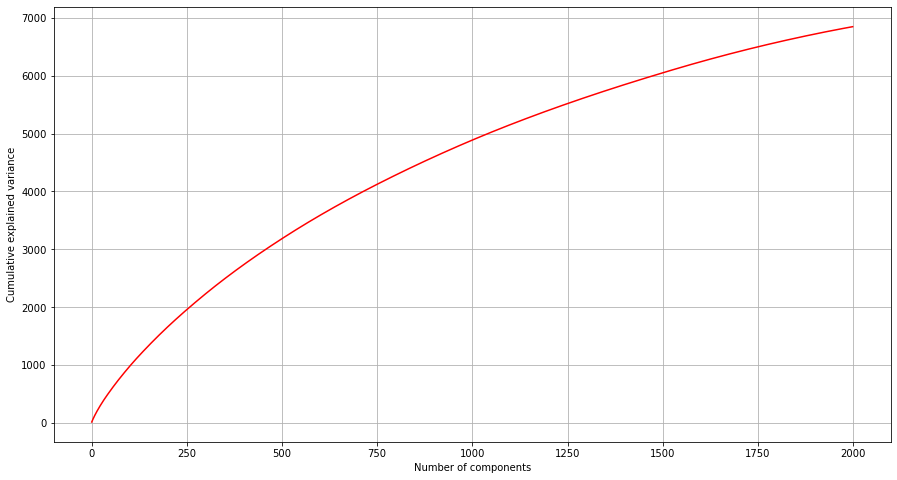

In [114]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(range(2000),variance_explained, color='r')
ax.grid(True)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [ ]:
pca = PCA()
pca.fit(X_rescaled)
pcx = pca.transform(X_rescaled)

In [175]:
svc = SVC(gamma='auto')
svc.fit(princComp, yTrain)
accuracy_score(yTest, svc.predict(xTest))*100

ValueError: Found input variables with inconsistent numbers of samples: [5574, 3901]

In [82]:
#Plotting data, to get a visual representation
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
#Adding x and y labels
ax.set_xlabel('PC1', fontsize=15)
ax.set_ylabel('PC2', fontsize=15)
#Adding title
ax.set_title('2-Component PCA Chart', fontsize=20)

classifications = [1, 0]
colors = ['b', 'r']
#Plotting scatter graph
for classification, color in zip(classifications, colors):
    indicesToKeep = mergedPrincDf['classification'] == classification
    ax.scatter(mergedPrincDf.loc[indicesToKeep, 'pc1'], 
               mergedPrincDf.loc[indicesToKeep, 'pc2'], 
               c=color, s=50)
    
ax.legend(classifications)
ax.grid()

NameError: name 'plt' is not defined

In [36]:
text = sms['text']
vect = CountVectorizer()
count = vect.fit_transform(text)
tokenized = pd.DataFrame(countMatrix.toarray(), columns=vect.get_feature_names())

result = sms['classification']
result.replace(resultEncodingDict, inplace=True)
xTrain, xTest, yTrain, yTest = train_test_split(tokenized, result, test_size=.3)

AttributeError: 'int' object has no attribute 'lower'

In [30]:
vectorizer = CountVectorizer(max_features=5000)
text = list(sms['text'])
labels = sms['label']

tfidf_reviews = vectorizer.fit_transform(text)

AttributeError: 'int' object has no attribute 'lower'

In [22]:
pca = PCA().fit(sms['text'])

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

ValueError: could not convert string to float: 'Go until jurong point crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'